In [ ]:
pip install persim

In [ ]:
pip install ripser

In [4]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from ripser import Rips
from persim import PersistenceImager

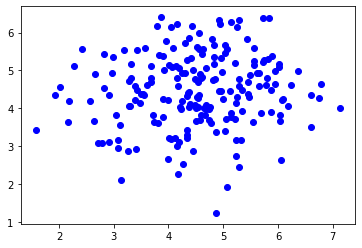

In [5]:
N = 200 
alpha = 5 # scale parametr
beta = 5 # shape parametr

x = [random.weibullvariate(alpha, beta) for i in range(N)]
y = [random.weibullvariate(alpha, beta) for j in range(N)]

plt.scatter(x, y, c='b')

In [6]:
a = 5
b = 5
r = 0.5
R = 1.5
N = 100

In [7]:
def dots_generation(alpha, beta, r, R, N):
     x_sample = []
     y_sample = []
     while len(x_sample) != N:
        x_dot = random.weibullvariate(alpha, beta)
        y_dot = random.weibullvariate(alpha, beta)
        if (x_dot - a) ** 2 + (y_dot - b) ** 2 > r ** 2 and (x_dot - a) ** 2 + (y_dot - b) ** 2 < R ** 2:
            x_sample.append(x_dot)
            y_sample.append(y_dot)
        
     return x_sample, y_sample

In [8]:
def plot(sample, a, b, r, R):
    fig = plt.figure(figsize=(10, 10), dpi=60)
    plt.scatter(sample[0], sample[1], c='r')
    circle = plt.Circle((a, b), r, color='b', fill=False)
    circle1 = plt.Circle((a, b), R, color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)
    ax.add_patch(circle1)
    plt.axis('scaled')
    plt.show()

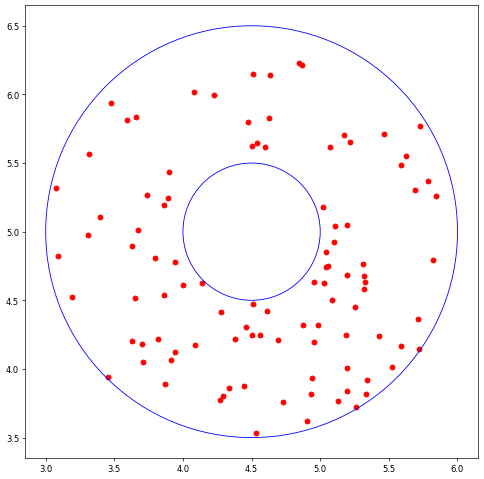

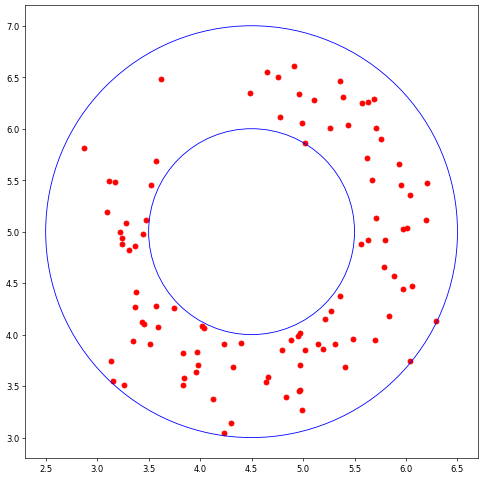

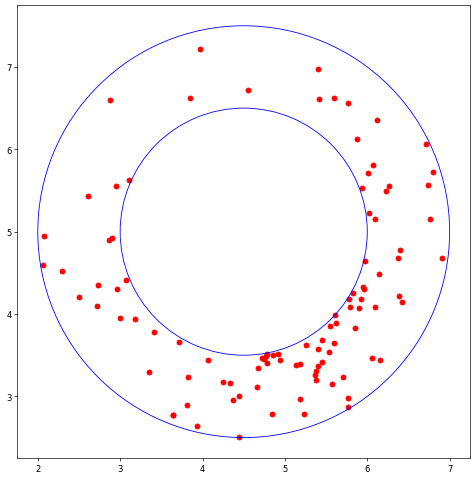

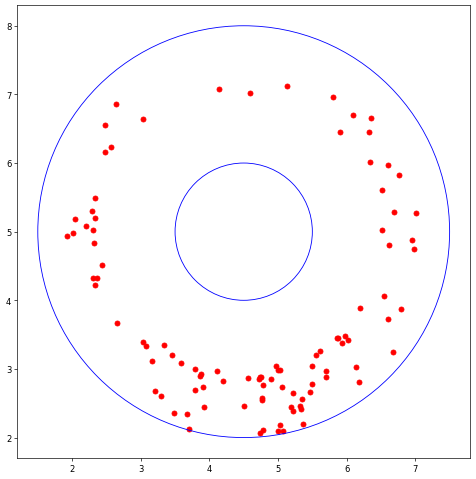

(None, None)

In [9]:
alpha, beta = 5, 5
a, b = 4.5, 5
r, R = 0.5, 1.5

plot(dots_generation(alpha, beta, r=0.5, R=1.5, N=100), a, b, r=0.5, R=1.5), plot(dots_generation(alpha, beta, r=1, R=2, N=100), a, b, r=1, R=2) 
plot(dots_generation(alpha, beta, r=1.5, R=2.5, N=100), a, b, r=1.5, R=2.5), plot(dots_generation(alpha, beta, r=2, R=3, N=100), a, b, r=1, R=3)

In [10]:
dots = dots_generation(alpha, beta, r=0.5, R=1.5, N=100)
sample = []
for i, j in zip(dots[0], dots[1]):
    sample.append([i, j])
sample[:5]

[[5.146315053435025, 5.04481274618059],
 [4.2116391567629465, 4.517605150621382],
 [3.841023857746324, 3.652754431007306],
 [3.3270676142780613, 4.295230687144892],
 [4.628870508009254, 4.0538230921916965]]

In [11]:
def plot_triangulation(sample, a, b, r, R):
    fig = plt.figure(figsize=(10, 10), dpi=60)
    plt.scatter(sample[0], sample[1], c='r')
    circle = plt.Circle((a, b), r, color='b', fill=False)
    circle1 = plt.Circle((a, b), R, color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)
    ax.add_patch(circle1)
    plt.axis('scaled')
    #plt.show()

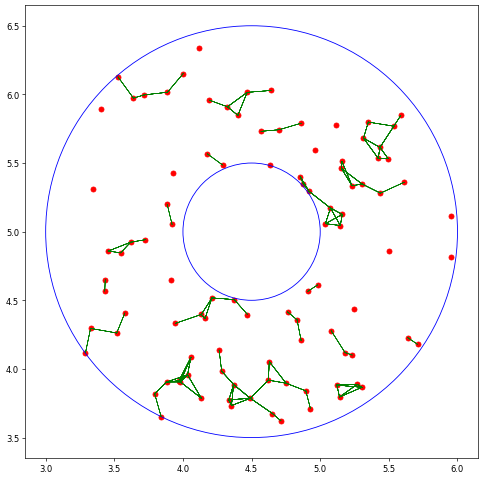

In [12]:
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    dx = x2 - x1
    dy = y2 - y1

    return math.sqrt(dx * dx + dy * dy)


plot_triangulation(dots, a, b, r=0.5, R=1.5) 
E = 0.2
for i in range(N):
    for j in range(N):
        for k in range(N):
            if distance(sample[i], sample[j]) < E and distance(sample[i], sample[k]) < E:
                plt.plot((sample[i][0], sample[j][0]), (sample[i][1], sample[j][1]), color="g", linewidth = 0.5)
                plt.plot((sample[i][0], sample[k][0]), (sample[i][1], sample[k][1]), color="g", linewidth = 0.5)

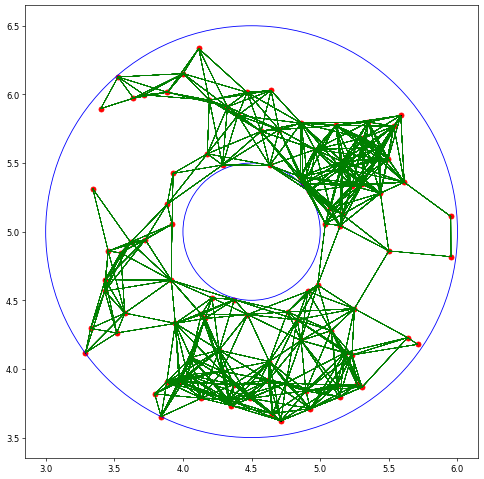

In [13]:
plot_triangulation(dots, a, b, r=0.5, R=1.5) 
E = 0.5
for i in range(N):
    for j in range(N):
        for k in range(N):
            if distance(sample[i], sample[j]) < E and distance(sample[i], sample[k]) < E:
                plt.plot((sample[i][0], sample[j][0]), (sample[i][1], sample[j][1]), color="g", linewidth = 0.5)
                plt.plot((sample[i][0], sample[k][0]), (sample[i][1], sample[k][1]), color="g", linewidth = 0.5)

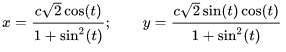

<Figure size 1200x600 with 0 Axes>

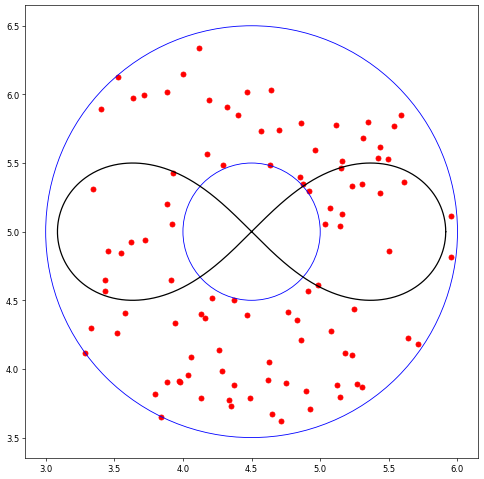

In [14]:
t = np.linspace(0, 2*np.pi, num=1000)
c = 1
x_ = 4.5 + c * np.sqrt(2) * np.cos(t) / (np.sin(t)**2 + 1)
y_ = 5 + c * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
fig = plt.figure(figsize=(20, 10), dpi=60)
plot_triangulation(dots, a, b, r=0.5, R=1.5)
plt.plot(x_, y_, c='black')

In [15]:
def sample_generation(alpha=5, beta=5, c=1):
     sample_x = []
     sample_y = []
     while len(sample_x) != 100:
        x = random.weibullvariate(alpha, beta)
        y = np.sqrt(np.sqrt(с**4 + 4 * x**2 * с**2) - x**2 - с**2) + 5
        if x < 4.5:    
            if y > 5 + c * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1) and y < -(5 + c * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)):
                sample_x.append(x)
                sample_y.append(y)
        elif x > 4.5:
            if y < 5 + c * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1) and y > -(5 + c * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)):
                sample_x.append(x)
                sample_y.append(y)
        
     return sample_x, sample_y

In [16]:
def lemniscate_upper(x, alpha):
    return np.sqrt(np.sqrt(alpha**4 + 4 * x**2 * alpha**2) - x**2 - alpha**2)

def lemniscate_lower(x, alpha):
    return -lemniscate_upper(x, alpha)


In [17]:
def plot_lemniscate(alpha):
    t = np.linspace(0, 2*np.pi, num=100) 
    xs = [alpha * np.sqrt(2)*np.cos(i) / (np.sin(i)**2+1) for i in t]
    ys = [alpha * np.sqrt(2)*np.cos(i)*np.sin(i) / (np.sin(i)**2+1) for i in t]
    plt.plot(xs, ys)
    return xs, ys

def plot_lemniscate_inner_points(xs1, xs2, alpha1, alpha2):
    r1 = np.max(xs1)
    r2 = np.max(xs2)

    lemniscate_points = []

    for i in range(len(sample)):
            x = random.uniform(-r1, r1)


            if (random.randint(0, 1) == 0):
                if (x < -r2 or x > r2):
                    lower = 0
                else:
                    lower = lemniscate_upper(x, alpha2)
                upper = lemniscate_upper(x, alpha1)
            else:
                lower = lemniscate_lower(x, alpha1)
                if (x < -r2 or x > r2):
                    upper = 0
                else:
                    upper = lemniscate_lower(x, alpha2)

            y = random.uniform(lower, upper)
            lemniscate_points.append([x, y])
    
    plt.scatter([x[0] for x in lemniscate_points], [x[1] for x in lemniscate_points], color='r')
    return lemniscate_points

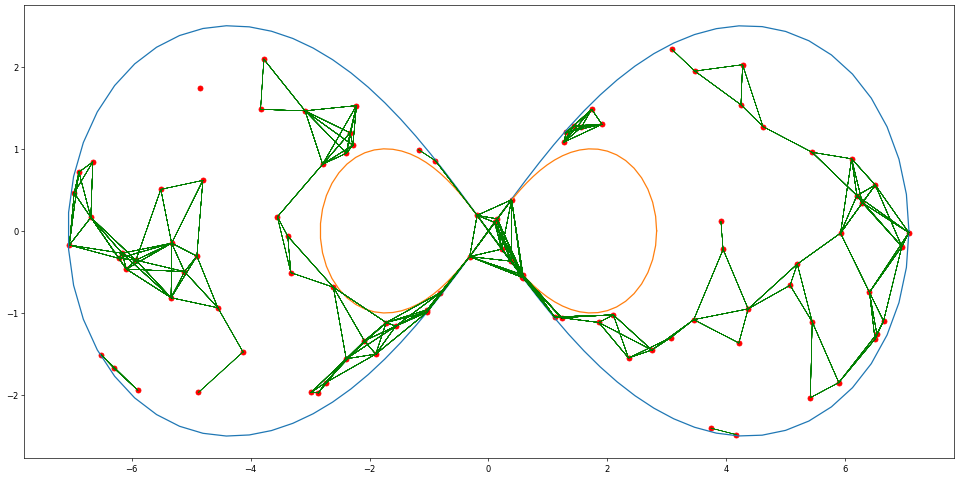

In [18]:
plt.figure(figsize=(20, 10), dpi=60)
points = plot_lemniscate_inner_points(plot_lemniscate(5), plot_lemniscate(2), 5, 2)
E = 1
triang = []
for i in range(N):
    for j in range(N):
        for k in range(N):
            if distance(points[i], points[j]) < E and distance(points[i], points[k]) < E:
                plt.plot((points[i][0], points[j][0]), (points[i][1], points[j][1]), color="g", linewidth = 0.5)
                plt.plot((points[i][0], points[k][0]), (points[i][1], points[k][1]), color="g", linewidth = 0.5)
                triang.append([points[i], points[j], points[k]])

Диаграммы персистенстности:

In [19]:
# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [20]:
# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 4)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 4.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(40, 10)


In [21]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to
# accomodate the specified pixel size.
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = np.array(triang)
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(-7.239132542963744, 7.260867457036257), pers_range=(-7.858520111285991, 7.641479888714009), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(29, 31)


In [ ]:
# The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.
# The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed
# to birth-persistence coordinates.
pimgs = pimgr.transform(pdgms, skew=True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


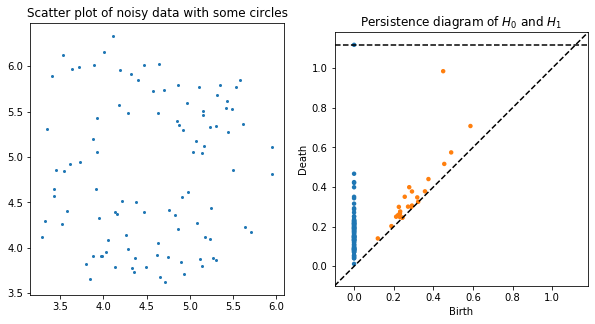

In [23]:
data = np.array(sample)

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()